# Overcoming a Theoretical Limitation of Self-Attention 

Replication of experiments on FIRST language learning from [Overcoming a Theoretical Limitation of Self-Attention  (Chiang and Cholak, 2022)](https://arxiv.org/pdf/2202.12172.pdf).

In [ ]:
from src.transformer import FirstTransformer
import torch
import pandas as pd

## Learning FIRST

Define training parameters as in the original paper. Citing from (David Chiang and Peter Cholak, 2020):
> We used `d_model` = 16 for word encodings, self-attention, and FFNN outputs, and `d_FFNN` = 64 for FFNN hidden layers. We used layer normalization (ε = 10^−5) after residual connections. We used PyTorch’s default initialization and trained using Adam (Kingma and Ba, 2015) with learning rate 3 × 10^−4 (Karpathy, 2016). We did not use dropout, as it did not seem to help.

In [ ]:
vocab = ["0", "1", "$"]

epochs = 20
layers = 2
heads = 1 
d_model = 16
d_ffnn = 64  
eps = 1e-5 # value added to denominator in layer normalization
scaled = False

### Generalization experiment

Initialize the Transformer to learn FIRST.

In [ ]:
transformer = FirstTransformer(len(vocab), layers, heads, d_model, d_ffnn, scaled, eps)
optim = torch.optim.Adam(transformer.parameters(), lr=0.0003)

Define model trainer and train the transformer.

In [ ]:
from src.trainer import Trainer
from src.dataset import Dataset

trainset = Dataset(0, 100, 10, random_seed=42, train=True, data_type='first', variable_lenght=False)
testset = Dataset(0, 100, 1000,  random_seed=42,  train=False, data_type='first', variable_lenght=False)

trainer = Trainer(0, transformer, optim, vocab, epochs, trainset, testset, verbose=1)
train_l, val_l, train_acc, val_acc = trainer.train()

In [ ]:
import matplotlib.pyplot as plt

fig = plt.figure()
plt.plot(range(epochs), train_l, color='blue', lw=2)
plt.plot(range(epochs), val_l, color='orange', lw=2)
plt.yscale('log')
plt.show()

In [ ]:
fig = plt.figure()
plt.plot(range(epochs), train_acc, color='blue', lw=2)
plt.plot(range(epochs), val_acc, color='orange', lw=2)
plt.ylim([0, 1.1])

ax = plt.gca()

handles, labels = ax.get_legend_handles_labels()
fig.legend(handles, labels, frameon=False, loc='lower center',  ncol=4)

### FIRST exact
Validation of FIRST exact solution.

In [1]:
from src.transformer import FirstExactTransformer, ParityExactTransformer

First of all, define model parameters.

In [2]:
vocab = ["0", "1", "$"]
d_model = 6 # do not change this!

Define the exact transformer model.

In [3]:
transformer = FirstExactTransformer(len(vocab), d_model) 

Validate the model with strings of increasing length in the interval [2,1000].

In [4]:
from src.validation import Validator
from src.dataset import Dataset

losses = []
accuracies = []

for l in range(2, 101):
    valset = Dataset(0, 100, l, random_seed=42, train=False, data_type='first', variable_lenght=False)
    validator = Validator(0, transformer, vocab, valset, verbose=1)
    loss, acc = validator.validate()
    losses.append(loss)
    accuracies.append(acc)

[Validation] Length 2. Loss: 54.945131957530975, Accuracy: 0.8
[Validation] Length 3. Loss: 66.1132773309946, Accuracy: 0.56
[Validation] Length 4. Loss: 61.60978747904301, Accuracy: 0.6
[Validation] Length 5. Loss: 71.45389950275421, Accuracy: 0.45
[Validation] Length 6. Loss: 67.87514571845531, Accuracy: 0.63
[Validation] Length 7. Loss: 73.6521780192852, Accuracy: 0.57
[Validation] Length 8. Loss: 70.15739993751049, Accuracy: 0.56
[Validation] Length 9. Loss: 63.3657009601593, Accuracy: 0.63
[Validation] Length 10. Loss: 77.38728103041649, Accuracy: 0.44
[Validation] Length 11. Loss: 72.76293021440506, Accuracy: 0.54
[Validation] Length 12. Loss: 76.65058933198452, Accuracy: 0.49
[Validation] Length 13. Loss: 78.0278530716896, Accuracy: 0.45
[Validation] Length 14. Loss: 75.76554736495018, Accuracy: 0.49
[Validation] Length 15. Loss: 74.4655002206564, Accuracy: 0.52
[Validation] Length 16. Loss: 73.16567029058933, Accuracy: 0.55
[Validation] Length 17. Loss: 83.69888970255852, Accur

Plot validation accuracy and loss for the different string lengths.

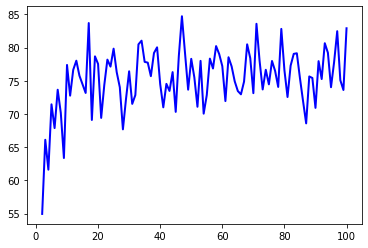

In [8]:
import matplotlib.pyplot as plt

fig = plt.figure()
plt.plot(range(2, 101), losses, color='blue', lw=2)
plt.show()

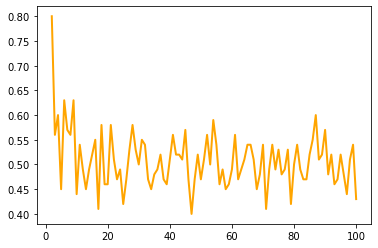

In [10]:
import matplotlib.pyplot as plt

fig = plt.figure()
plt.plot(range(2, 101), accuracies, color='orange', lw=2)
plt.show()